In [ ]:
### SETTING UP THE DATAFRAME ###

In [1]:
#Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
from Bio import SeqIO

In [2]:
#Changing working directory to location of fasta files (data directory)
os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

'.'

'1212_1D_barcoding_Wagga_BC01.WW_19122016.noblasthit.fa'

In [3]:
#Produces list of files in data directory as strings, assigns to list_names
file_names = [x for x in os.walk('.', topdown=False)][1][2]
file_names.sort()

#Make a list of all available barcodes, based on fasta file names
file_names_barcodelist = []
for bcs in range(1, len(file_names)):
    file_names_barcodelist.append(file_names[bcs][-7:-3]) #Convert to a search parameter?

print(file_names[1][-7:-3])  
#print(file_names_barcodelist)

#CODE A WAY TO EXCLUDE THIT (BESTHIT)

thit


In [610]:
#Create categories for 'all barcodes', 'good barcodes' and 'bad barcodes'
all_barcodes_set = set(file_names_barcodelist)
all_barcodes = sorted(list(all_barcodes_set))

good_barcodes_set = set(['BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'BC06'])
good_barcodes = sorted(list(good_barcodes_set))

bad_barcodes_set = all_barcodes_set - good_barcodes_set
bad_barcodes = sorted(list(bad_barcodes_set))
bad_barcodes_BC00 = [x for x in bad_barcodes if 'BC' in x]
bad_barcodes_NB00 = [x for x in bad_barcodes if 'NB' in x]

In [612]:
#Create text file to summarise read_id, barcode and length of each read from fasta files for pandas
_id = "12122016_1D_barcoding_Wagga."
length_file = _id + "lengths.txt"
lengths = open(length_file, "w")
print("Read_id,Barcode,Length,GoodorBad", file=lengths)

for fa_file in file_names: #file_names had the list of all the barcode fasta file names
    for seq in SeqIO.parse(open(fa_file), 'fasta'):
        if fa_file[-7:-3] == 'thit':  #CHECK THIS FOR GENERALISATION! HOW TO REMOVE READ DUPLICATES FROM FOLDER
            continue
        if fa_file[-7:-3] in good_barcodes:
            print(seq.id + "," + fa_file[-7:-3] + "," + str(len(seq)) + "," + 'Good', file=lengths)
        if fa_file[-7:-3] in bad_barcodes_BC00:
            print(seq.id + "," + fa_file[-7:-3] + "," + str(len(seq)) + "," + 'Bad-BC', file=lengths)
        if fa_file[-7:-3] in bad_barcodes_NB00:
            print(seq.id + "," + fa_file[-7:-3] + "," + str(len(seq)) + "," + 'Bad-NB', file=lengths)
lengths.close()

In [613]:
# Formatting for the dataframe plots
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize': 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'}
label_config_y = {'fontsize': 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'}

In [614]:
poretools_df = pd.read_csv(length_file)
#poretools_df.head()
#imports summary .txt file as a .csv file, labelled as poretools dataframe

In [ ]:
### DATAFRAME ANALYSIS - TABLE OF SUMMARY DATA ###

In [618]:
### Shows number of reads, sum, max, mean and median of read lengths, per good barcode ###

#Defines table layout for summary data
layout = "{0:<7}{1:^7}{2:>12}{3:>21}{4:>18}{5:>19}{6:>21}"
print(layout.format("Barcode:", "   ", "No of Reads:", "Total Length (Mbp):", "Max Length (bp):", "Mean Length (bp):", "Median Length (bp):"))
print(layout.format("-------", "---", "------------", "-------------------",  "----------------", "-----------------", "-------------------"))

#Print summary data for good barcodes individually
for bcs in good_barcodes:
    ind_good_barcodes_count = poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].count()
    ind_good_barcodes_sum = int(poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].sum()) / 1000000
    ind_good_barcodes_max = int(poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].max())
    ind_good_barcodes_mean = int(poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].mean())
    ind_good_barcodes_median = int(poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].median())
    print(layout.format(bcs, "---", ind_good_barcodes_count, float("{0:.3f}".format(ind_good_barcodes_sum)), ind_good_barcodes_max, ind_good_barcodes_mean, ind_good_barcodes_median))

#DEFINE summary data for good barcodes collectively
good_barcodes_count = poretools_df.loc[poretools_df['GoodorBad'] == 'Good']['Length'].count()
good_barcodes_sum = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Good']['Length'].sum()) / 1000000
good_barcodes_max = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Good']['Length'].max())
good_barcodes_mean = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Good']['Length'].mean())
good_barcodes_median = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Good']['Length'].median())    

print(layout.format("-------", "---", "------------", "-------------------",  "----------------", "-----------------", "-------------------"))

#Print summary data for BC bad barcodes collectively as 'BC00'
bad_barcodes_BC_count = poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-BC']['Length'].count()
bad_barcodes_BC_sum = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-BC']['Length'].sum()) / 1000000
bad_barcodes_BC_max = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-BC']['Length'].max())
bad_barcodes_BC_mean = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-BC']['Length'].mean())
bad_barcodes_BC_median = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-BC']['Length'].median())
print(layout.format("BC00", "---", bad_barcodes_BC_count, float("{0:.3f}".format(bad_barcodes_BC_sum)), bad_barcodes_BC_max, bad_barcodes_BC_mean, bad_barcodes_BC_median))

#Print summary data for NB bad barcodes collectively as 'NB00'
bad_barcodes_NB_count = poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-NB']['Length'].count()
bad_barcodes_NB_sum = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-NB']['Length'].sum()) / 1000000
bad_barcodes_NB_max = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-NB']['Length'].max())
bad_barcodes_NB_mean = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-NB']['Length'].mean())
bad_barcodes_NB_median = int(poretools_df.loc[poretools_df['GoodorBad'] == 'Bad-NB']['Length'].median())
print(layout.format("NB00", "---", bad_barcodes_NB_count, float("{0:.3f}".format(bad_barcodes_NB_sum)), bad_barcodes_NB_max, bad_barcodes_NB_mean, bad_barcodes_NB_median))

print(layout.format("-------", "---", "------------", "-------------------",  "----------------", "-----------------", "-------------------"))

#Print summary data for all barcodes collectively as 'All'
all_barcodes_count = poretools_df['Length'].count()
all_barcodes_sum = int(poretools_df['Length'].sum()) / 1000000
all_barcodes_max = int(poretools_df['Length'].max())
all_barcodes_mean = int(poretools_df['Length'].mean())
all_barcodes_median = int(poretools_df['Length'].median())
print(layout.format("All", "---", all_barcodes_count, float("{0:.3f}".format(all_barcodes_sum)), all_barcodes_max, all_barcodes_mean, all_barcodes_median))


Barcode:       No of Reads:  Total Length (Mbp):  Max Length (bp):  Mean Length (bp):  Median Length (bp):
-------  ---  ------------  -------------------  ----------------  -----------------  -------------------
BC01     ---         18266               18.606             11819               1018                  693
BC02     ---        115781              191.952             21396               1657                 1270
BC03     ---         41798               68.821             13611               1646                 1256
BC04     ---        147695              267.731             21168               1812                 1462
BC05     ---         88410              154.332             22870               1745                 1351
BC06     ---        112065               140.44             16977               1253                  936
-------  ---  ------------  -------------------  ----------------  -----------------  -------------------
BC00     ---          3057                5.0

In [ ]:
### DATAFRAME ANALYSIS - HISTOGRAMS OF SUMMARY DATA ###

#Get to show number of reads and total length printed on graph
#Get colour legends for specific barcodes in grouped graphs

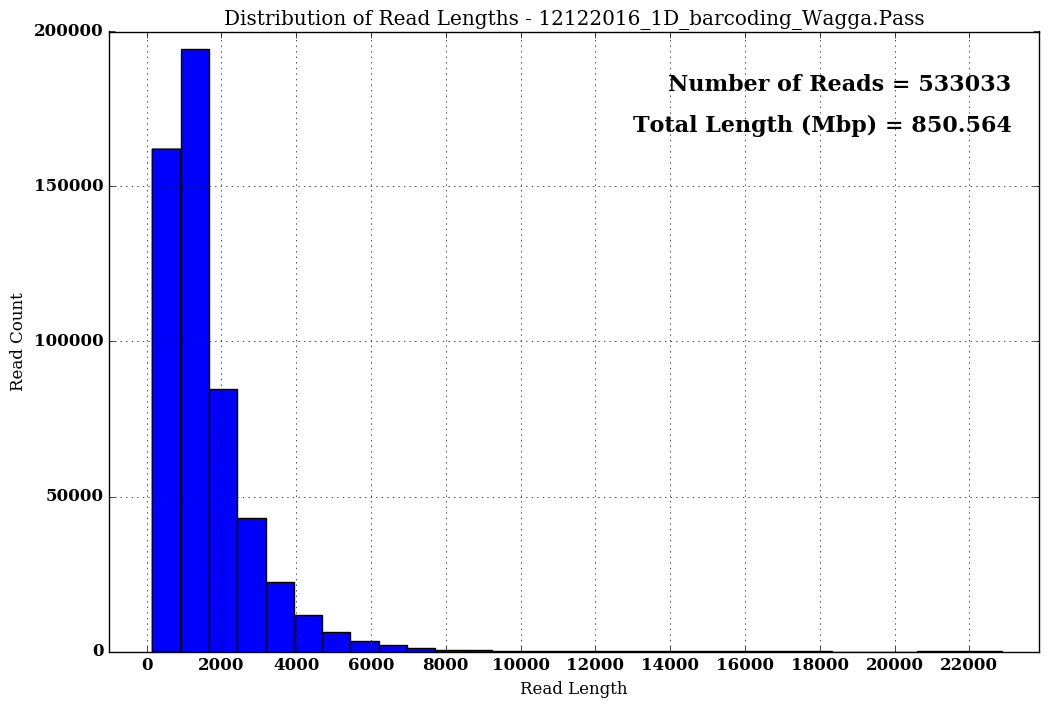

In [619]:
#Histogram of read length distribution for all barcodes together
plt.figure(figsize=(12,8))
poretools_df['Length'].hist(bins=30)
plt.title('Distribution of Read Lengths - ' + _id + 'Pass')

plt.xlabel('Read Length')
plt.xticks(np.arange(0, poretools_df['Length'].max()+1, 2000))
plt.xlim([-1000, poretools_df['Length'].max()+1000])

plt.ylabel('Read Count')

plt.annotate('Number of Reads = ' + str(all_barcodes_count), xy=(1, 1), xycoords='axes fraction', fontsize=16,
                xytext=(-20, -30), textcoords='offset points', ha='right', va='top')
plt.annotate('Total Length (Mbp) = ' + str(float("{0:.3f}".format(all_barcodes_sum))), xy=(1, 1), xycoords='axes fraction', fontsize=16,
                xytext=(-20, -60), textcoords='offset points', ha='right', va='top')

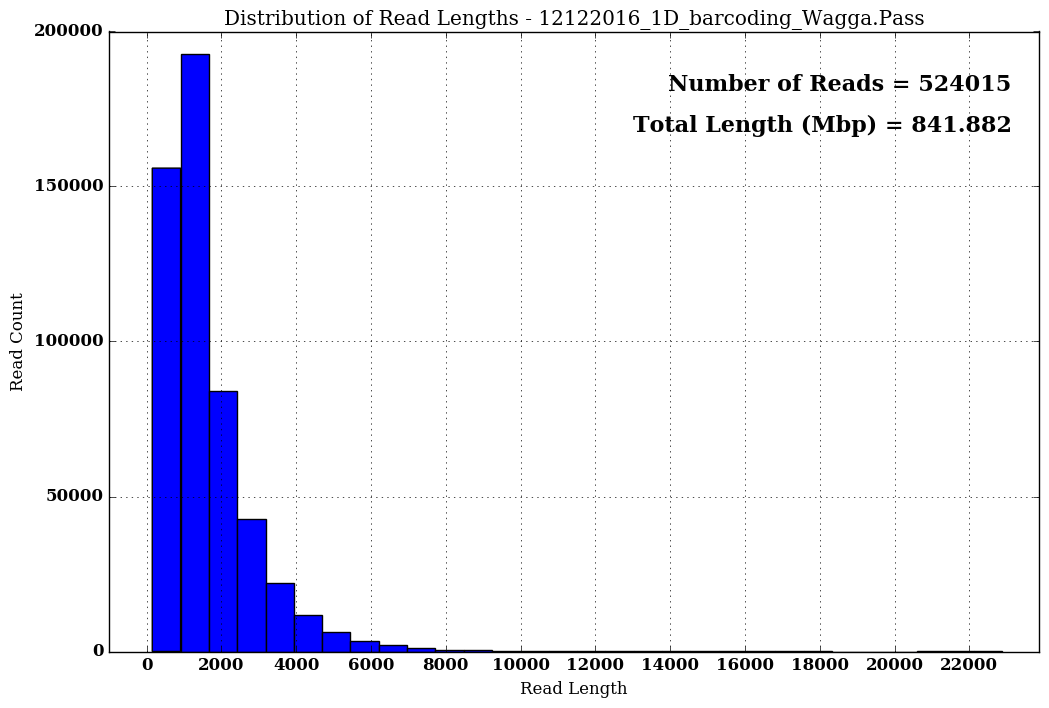

In [620]:
#Histogram of read length distribution for BC01 - BC06, together
plt.figure(figsize=(12,8))
poretools_df.loc[poretools_df['GoodorBad'] == 'Good']['Length'].hist(bins=30)

plt.title('Distribution of Read Lengths - ' + _id + 'Pass')

plt.xlabel('Read Length')
plt.xticks(np.arange(0, poretools_df['Length'].max()+1, 2000))
plt.xlim([-1000, poretools_df['Length'].max()+1000])

plt.ylabel('Read Count')

plt.annotate('Number of Reads = ' + str(good_barcodes_count), xy=(1, 1), xycoords='axes fraction', fontsize=16,
                xytext=(-20, -30), textcoords='offset points', ha='right', va='top')
plt.annotate('Total Length (Mbp) = ' + str(float("{0:.3f}".format(good_barcodes_sum))), xy=(1, 1), xycoords='axes fraction', fontsize=16,
                xytext=(-20, -60), textcoords='offset points', ha='right', va='top')

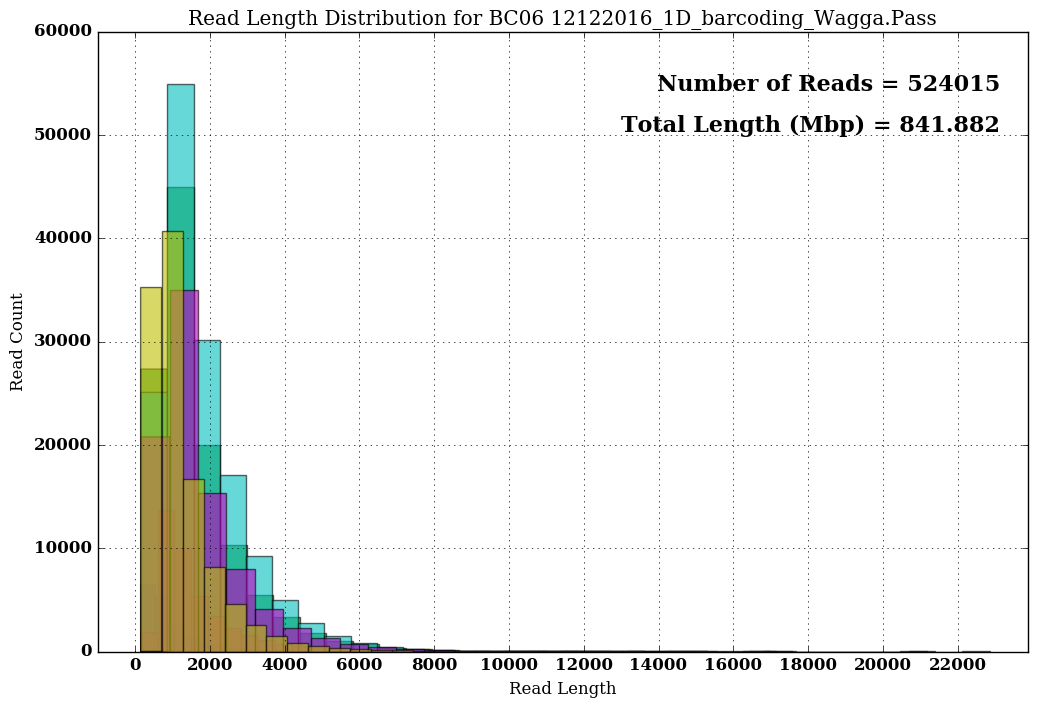

In [621]:
#Histogram of read length distribution for BC01 - BC06 grouped
plt.figure(figsize=(12,8))

for bcs in good_barcodes:
    poretools_df.groupby('Barcode')['Length'].get_group(bcs).hist(bins=30, alpha=0.6) #Three separate modules being used in the same line!

plt.title('Read Length Distribution for ' + bcs + ' ' + _id + 'Pass')

plt.xlabel('Read Length')
plt.xticks(np.arange(0, poretools_df['Length'].max()+1, 2000))
plt.xlim([-1000, poretools_df['Length'].max()+1000])

plt.ylabel('Read Count')

plt.annotate('Number of Reads = ' + str(good_barcodes_count), xy=(1, 1), xycoords='axes fraction', fontsize=16,
                xytext=(-20, -30), textcoords='offset points', ha='right', va='top')
plt.annotate('Total Length (Mbp) = ' + str(float("{0:.3f}".format(good_barcodes_sum))), xy=(1, 1), xycoords='axes fraction', fontsize=16,
                xytext=(-20, -60), textcoords='offset points', ha='right', va='top')

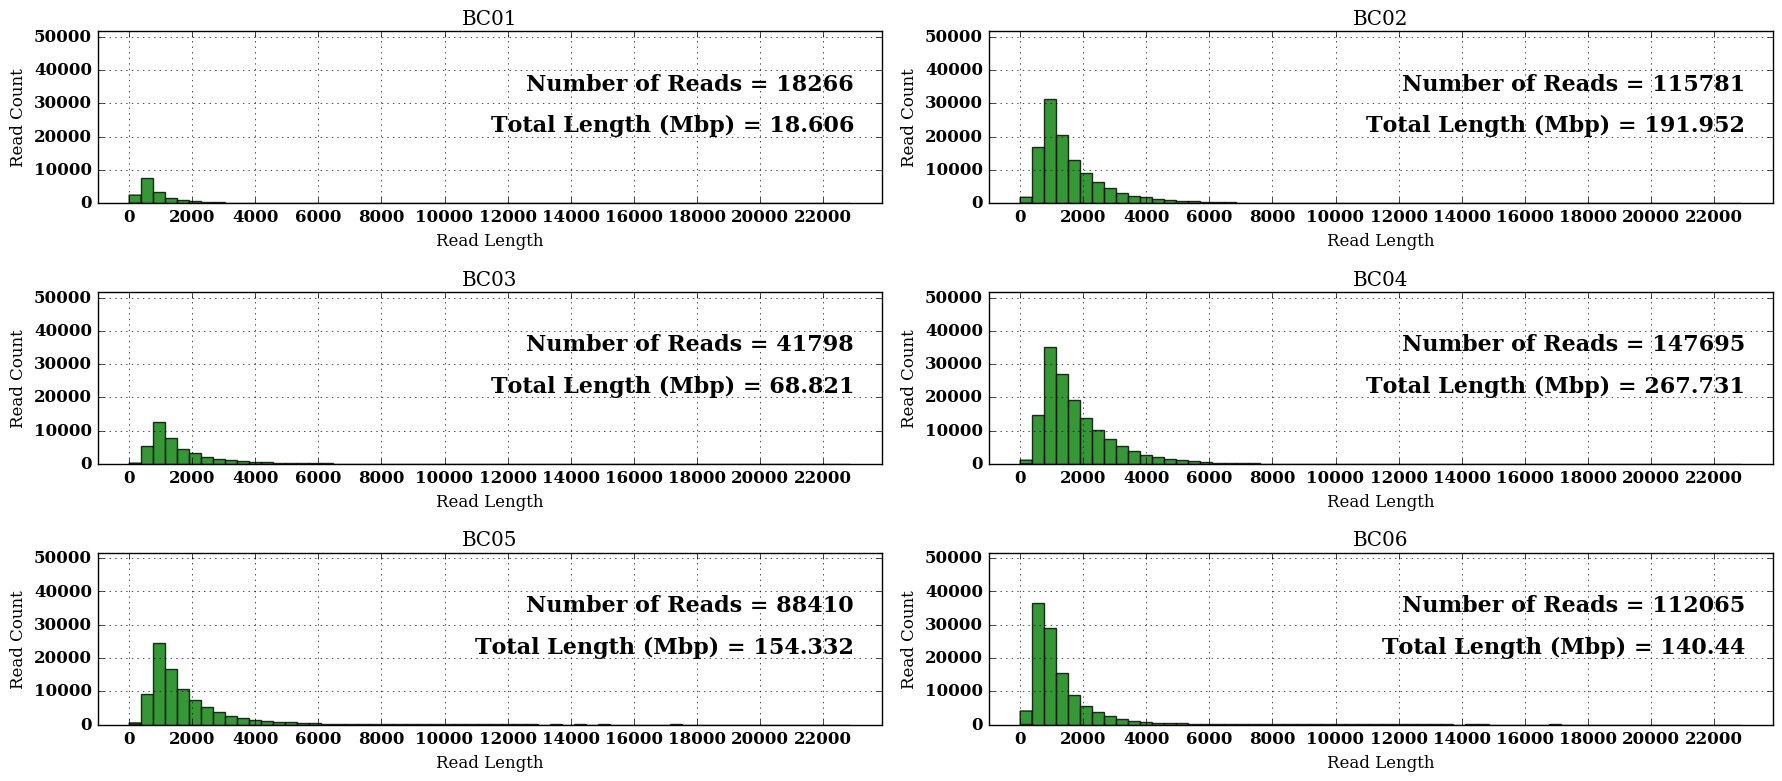

In [622]:
#Histograms of read length distribution for BC01 - BC06, separately
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)
xmax = int(poretools_df['Length'].max())

grouped = poretools_df.groupby('Barcode')  # CHECK THIS FOR SCALABILITY, NOT ENTIRELY SURE WHAT THIS DOES
max_count_list = []
for key in grouped.groups.keys():
    max_count_list.append(np.histogram(grouped.Length.get_group(key), 50)[0].max())
max_count_list.sort()

def applyPlotStyle(ax, bcs):
    ax.set_title(bcs)
    ax.set_xlabel('Read Length')
    ax.set_ylabel('Read Count');
    ax.set_xlim([-1000, poretools_df['Length'].max()+1000])
    ax.set_xticks(np.arange(0, xmax+1, 2000))
    ax.set_ylim(0, max_count_list[-1]*(3/2))
    ax.grid(True, which='Major')
    ax.annotate('Number of Reads = ' + str(poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].count()), 
             xy=(1, 1), xycoords='axes fraction', fontsize=16, xytext=(-20, -30), textcoords='offset points', 
             ha='right', va='top')
    ax.annotate('Total Length (Mbp) = ' + str(float("{0:.3f}".format(poretools_df.loc[poretools_df['Barcode'] == bcs]['Length'].sum() / 1000000))), 
             xy=(1, 1), xycoords='axes fraction', fontsize=16, 
             xytext=(-20, -60), textcoords='offset points', ha='right', va='top')
    
ax1.hist(poretools_df.groupby('Barcode')['Length'].get_group('BC01'), bins=range(0, xmax, int(xmax/60)), color='green', alpha=0.8)
applyPlotStyle(ax1, 'BC01')

ax2.hist(poretools_df.groupby('Barcode')['Length'].get_group('BC02'), bins=range(0, xmax, int(xmax/60)), color='green', alpha=0.8)
applyPlotStyle(ax2, 'BC02')

ax3.hist(poretools_df.groupby('Barcode')['Length'].get_group('BC03'), bins=range(0, xmax, int(xmax/60)), color='green', alpha=0.8)
applyPlotStyle(ax3, 'BC03')

ax4.hist(poretools_df.groupby('Barcode')['Length'].get_group('BC04'), bins=range(0, xmax, int(xmax/60)), color='green', alpha=0.8)
applyPlotStyle(ax4, 'BC04')

ax5.hist(poretools_df.groupby('Barcode')['Length'].get_group('BC05'), bins=range(0, xmax, int(xmax/60)), color='green', alpha=0.8)
applyPlotStyle(ax5, 'BC05')

ax6.hist(poretools_df.groupby('Barcode')['Length'].get_group('BC06'), bins=range(0, xmax, int(xmax/60)), color='green', alpha=0.8)
applyPlotStyle(ax6, 'BC06')

plt.tight_layout()
plt.show()

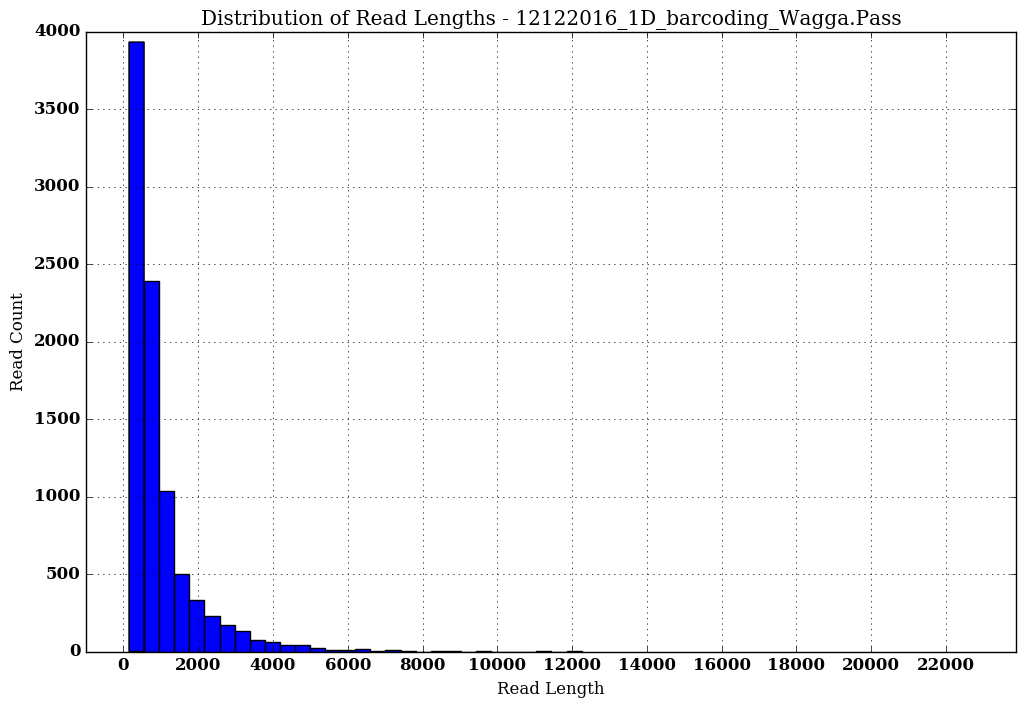

In [636]:
#Histogram of read length distribution for BC07 - NB12 together
plt.figure(figsize=(12,8))
poretools_df.loc[poretools_df['GoodorBad'] != 'Good']['Length'].hist(bins=30)

plt.title('Distribution of Read Lengths - ' + _id + 'Pass')

plt.xlabel('Read Length')
plt.xticks(np.arange(0, poretools_df['Length'].max()+1, 2000))
plt.xlim([-1000, poretools_df['Length'].max()+1000])

plt.ylabel('Read Count')

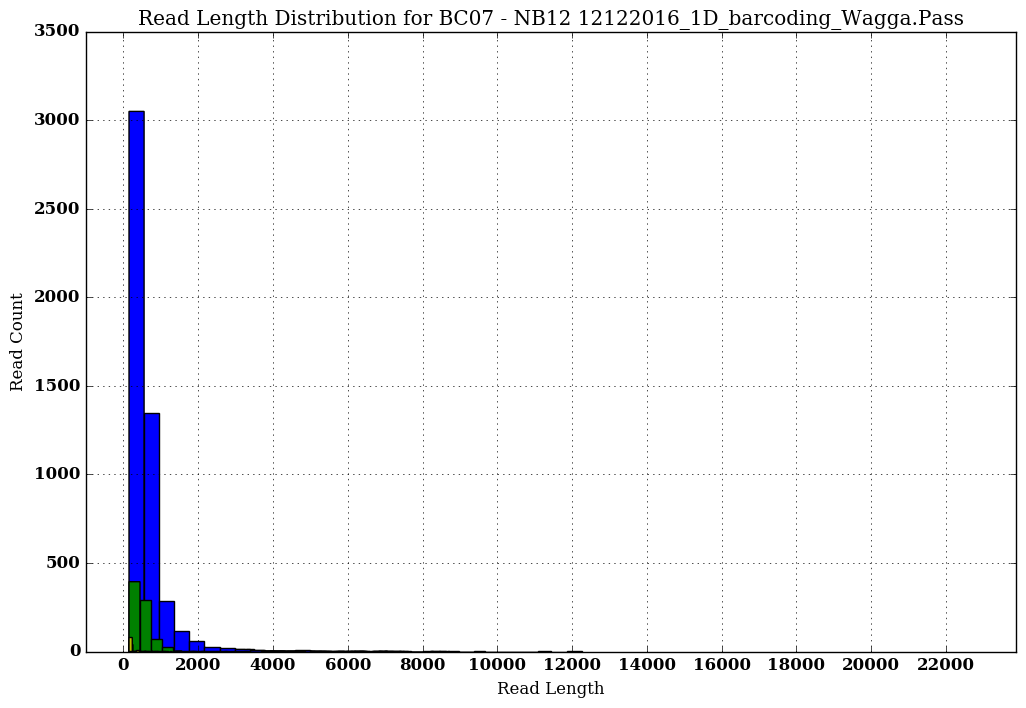

In [642]:
#Histogram of read length distribution for BC07 - NB12, grouped
plt.figure(figsize=(12,8))
    
for bcs in bad_barcodes_BC00:
    poretools_df.groupby('Barcode')['Length'].get_group(bcs).hist(bins=30) #Three separate modules being used in the same line!
for bcs in bad_barcodes_NB00:
    poretools_df.groupby('Barcode')['Length'].get_group(bcs).hist(bins=30) #Three separate modules being used in the same line!

plt.title('Read Length Distribution for BC07 - NB12 ' + _id + 'Pass')

plt.xlabel('Read Length')
plt.xticks(np.arange(0, poretools_df['Length'].max()+1, 2000))
plt.xlim([-1000, poretools_df['Length'].max()+1000])

plt.ylabel('Read Count')

# THIT IS COMING UP, WHY?

In [ ]:
### BLAST SEARCH ### - WIP!

In [ ]:
#>>> from Bio.Blast import NCBIWWW
#>>> fasta_string = open("m_cold.fasta").read()
#>>> result_handle = NCBIWWW.qblast("blastn", "nt", fasta_string)

#>>> save_file = open("my_blast.xml", "w")
#>>> save_file.write(result_handle.read())
#>>> save_file.close()
#>>> result_handle.close()

#>>> result_handle = open("my_blast.xml")

#>>> from Bio.Blast import NCBIXML
#>>> blast_records = NCBIXML.parse(result_handle)
#>>> for blast_record in blast_records:
#...     # Do something with blast_record

In [ ]:
### BLAST ANALYSIS ###

In [16]:
#Changing working directory to location of blast files (blast directory)
os.chdir('/home/gamran/blast/')
outdir = '/home/gamran/analysis/'
os.curdir

'.'

In [562]:
#Constructing dataframes for each individual blasted barcode
import os
blast_input_dir = '/home/gamran/blast'
blast_files = os.walk(blast_input_dir, topdown=False)
blast_files_in_folder = [x for x in blast_files][1][2]

In [563]:
#Creating a dictionary for blasted barcodes - key: 'barcode', value: related blast dataframe
blast_dfs_dict = {}
for file_name in blast_files_in_folder:
    if '.blast.besthit' in file_name:
        key = '' #Safety 
        key = file_name.split('.')[0][-4:] # Try to make a pattern match, not an index hard code
        blast_dfs_dict[key] = pd.read_table(file_name, delim_whitespace=True, 
                                           names=['qseqid', 'sseqid', 'evalue', 'bitscore', 'length', 'pident', 
                                           'nident', 'species', 'barcode'])

BC01
BC04
BC06
BC03
BC00
BC05
BC02
NB00


In [566]:
#Assigning reads a human-readable species name based on sseqid
for bcs, dfs in blast_dfs_dict.items():
    for i in range(0, len(dfs)):
        dfs.loc[i, 'barcode'] = bcs
        if 'TGAC' in str(dfs['sseqid'][i]):
            dfs.loc[i, 'species'] = 'Wheat'
        elif 'Zymo' in str(dfs['sseqid'][i]):
            dfs.loc[i, 'species'] = 'Zymoseptoria tritici'
        elif 'Ptri' in str(dfs['sseqid'][i]):
            dfs.loc[i, 'species'] = 'Pyrenophore tritici-repentis'
        elif 'Pst' in str(dfs['sseqid'][i]):
            dfs.loc[i, 'species'] = 'P. striformis f. sp. tritici WA'
        elif 'tig' in str(dfs['sseqid'][i]):
            dfs.loc[i, 'species'] = 'Parastagonospora nodorum'
        else:
            dfs.loc[i, 'species'] = 'N/A'
    
# REALLY SLOW - MAKE FASTER: POSSIBILITIES
# add barcode column after read generation instead of in loop: blast_dfs_dict[bcs]['barcode'] = 'bcs'
# need to remove 'barcode' column from pd.read_table

In [728]:
#Create a new dataframe that combines all individual barcodes dataframes
blast_df_list = []
for bcs in blast_dfs_dict.keys():
    blast_df_list.append(blast_dfs_dict[bcs])
    
joint_blast_df = pd.concat(blast_df_list, axis=0, ignore_index=True)
joint_blast_df.sort_values('barcode', ascending=True, inplace=True)
joint_blast_df.reset_index(drop=True, inplace=True)

In [1198]:
#Summary table from all blast dataframes: species count per barcode
joint_blast_pivot_table = joint_blast_df.pivot_table(values='nident', index='barcode', columns='species', aggfunc='count', fill_value=0, margins=True)
joint_blast_pivot_table.index.name = None
joint_blast_pivot_table.columns.name = None


,P. striformis f. sp. tritici WA,Parastagonospora nodorum,Pyrenophore tritici-repentis,Wheat,Zymoseptoria tritici,All
BC00,10.0,0.0,6.0,2715.0,8.0,2739.0
BC01,4.0,0.0,3.0,7650.0,129.0,7786.0
BC02,1306.0,17.0,33.0,101894.0,18.0,103268.0
BC03,2.0,26.0,1572.0,36879.0,12.0,38491.0
BC04,3.0,2.0,4.0,135376.0,23.0,135408.0
BC05,247.0,38.0,76.0,79380.0,810.0,80551.0
BC06,4.0,6.0,6.0,81409.0,1345.0,82770.0
NB00,2.0,0.0,1.0,550.0,2.0,555.0
All,1578.0,89.0,1701.0,445853.0,2347.0,451568.0


In [1275]:
#Removes the 'all' column (for graphing purposes)
joint_blast_pivot_table_noall = joint_blast_pivot_table.drop('All', axis=1)

,P. striformis f. sp. tritici WA,Parastagonospora nodorum,Pyrenophore tritici-repentis,Wheat,Zymoseptoria tritici
BC00,10.0,0.0,6.0,2715.0,8.0
BC01,4.0,0.0,3.0,7650.0,129.0
BC02,1306.0,17.0,33.0,101894.0,18.0
BC03,2.0,26.0,1572.0,36879.0,12.0
BC04,3.0,2.0,4.0,135376.0,23.0
BC05,247.0,38.0,76.0,79380.0,810.0
BC06,4.0,6.0,6.0,81409.0,1345.0
NB00,2.0,0.0,1.0,550.0,2.0
All,1578.0,89.0,1701.0,445853.0,2347.0


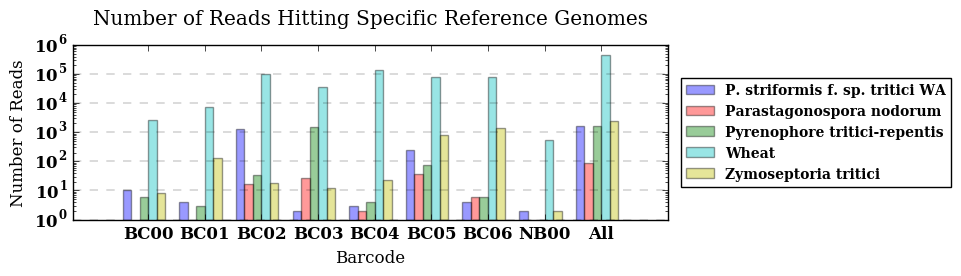

In [1277]:
# 
n_groups = len(joint_blast_pivot_table_noall.index.values)

n_pst = tuple(joint_blast_pivot_table_noall['P. striformis f. sp. tritici WA'])
n_para = tuple(joint_blast_pivot_table_noall['Parastagonospora nodorum'])
n_pyre = tuple(joint_blast_pivot_table_noall['Pyrenophore tritici-repentis'])
n_wheat = tuple(joint_blast_pivot_table_noall['Wheat'])
n_zymo = tuple(joint_blast_pivot_table_noall['Zymoseptoria tritici'])

fig, ax = plt.subplots(figsize=(7,3))

index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.4

rects1 = plt.bar(index - bar_width*2, n_pst, bar_width,
                 alpha=opacity,
                 log=True,
                 color='b',
                 label='P. striformis f. sp. tritici WA')

rects2 = plt.bar(index - bar_width, n_para, bar_width,
                 alpha=opacity,
                 log=True,
                 color='r',
                 label='Parastagonospora nodorum')

rects3 = plt.bar(index, n_pyre, bar_width,
                 alpha=opacity,
                 log=True,
                 color='g',
                 label='Pyrenophore tritici-repentis')

rects4 = plt.bar(index + bar_width, n_wheat, bar_width,
                 alpha=opacity,
                 log=True,
                 color='c',
                 label='Wheat')

rects5 = plt.bar(index + bar_width*2, n_zymo, bar_width,
                 alpha=opacity,
                 log=True,
                 color='y',
                 label='Zymoseptoria tritici')

plt.xlabel('Barcode')
plt.ylabel('Number of Reads')
plt.title('Number of Reads Hitting Specific Reference Genomes', y=1.08)
plt.xticks(index + bar_width, tuple(joint_blast_pivot_table_noall.index.values))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10)
plt.grid(b=None, which='major', axis='y', linestyle='dashed', linewidth=0.2)
plt.margins(x=0.1)
plt.tight_layout()
plt.show()

# Set y axis to decimals somehow?

In [1233]:
#Summary table from all blast dataframes: species % per barcode
joint_blast_pivot_table_pc = joint_blast_pivot_table.copy()

for spcs in joint_blast_pivot_table.columns:
    joint_blast_pivot_table_pc[str(spcs) + '%'] = np.round((joint_blast_pivot_table_pc[spcs] / joint_blast_pivot_table_pc['All'] * 100), 3)
for spcs in joint_blast_pivot_table.columns:
    joint_blast_pivot_table_pc.drop(spcs, axis=1, inplace=True)
    
joint_blast_pivot_table_pc.drop('All%', axis=1, inplace=True)
#joint_blast_pivot_table_pc

,P. striformis f. sp. tritici WA%,Parastagonospora nodorum%,Pyrenophore tritici-repentis%,Wheat%,Zymoseptoria tritici%
BC00,0.365,0.000,0.219,99.124,0.292
BC01,0.051,0.000,0.039,98.253,1.657
BC02,1.265,0.016,0.032,98.669,0.017
BC03,0.005,0.068,4.084,95.812,0.031
BC04,0.002,0.001,0.003,99.976,0.017
BC05,0.307,0.047,0.094,98.546,1.006
BC06,0.005,0.007,0.007,98.356,1.625
NB00,0.360,0.000,0.180,99.099,0.360
All,0.349,0.020,0.377,98.734,0.520


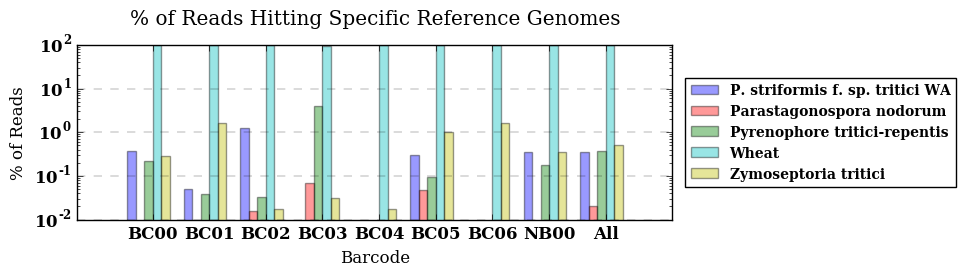

In [1271]:
# 
n_groups = len(joint_blast_pivot_table_pc.index.values)

pc_pst = tuple(joint_blast_pivot_table_pc['P. striformis f. sp. tritici WA%'])
pc_para = tuple(joint_blast_pivot_table_pc['Parastagonospora nodorum%'])
pc_pyre = tuple(joint_blast_pivot_table_pc['Pyrenophore tritici-repentis%'])
pc_wheat = tuple(joint_blast_pivot_table_pc['Wheat%'])
pc_zymo = tuple(joint_blast_pivot_table_pc['Zymoseptoria tritici%'])

fig, ax = plt.subplots(figsize=(7,3))

index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.4

rects1 = plt.bar(index - bar_width*2, pc_pst, bar_width,
                 alpha=opacity,
                 log=True,
                 color='b',
                 label='P. striformis f. sp. tritici WA')

rects2 = plt.bar(index - bar_width, pc_para, bar_width,
                 alpha=opacity,
                 log=True,
                 color='r',
                 label='Parastagonospora nodorum')

rects3 = plt.bar(index, pc_pyre, bar_width,
                 alpha=opacity,
                 log=True,
                 color='g',
                 label='Pyrenophore tritici-repentis')

rects4 = plt.bar(index + bar_width, pc_wheat, bar_width,
                 alpha=opacity,
                 log=True,
                 color='c',
                 label='Wheat')

rects5 = plt.bar(index + bar_width*2, pc_zymo, bar_width,
                 alpha=opacity,
                 log=True,
                 color='y',
                 label='Zymoseptoria tritici')

plt.xlabel('Barcode')
plt.ylabel('% of Reads')
plt.title('% of Reads Hitting Specific Reference Genomes', y=1.08)
plt.xticks(index + bar_width, tuple(joint_blast_pivot_table_pc.index.values))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10)
plt.grid(b=None, which='major', axis='y', linestyle='dashed', linewidth=0.2)
plt.margins(x=0.1)
plt.tight_layout()
plt.show()

# Set y axis to decimals somehow?

In [ ]:
#Hard-coded generation of not-blasted reads per barcode blast dataframe.

In [602]:
BC01_read_id_list_set = set(poretools_df.groupby('Barcode')['Read_id'].get_group('BC01').tolist())
BC01_read_id_list = sorted(list(BC01_read_id_list_set))

BC01_qseqid_list_set = set(blast_dfs_dict['BC01']['qseqid'].tolist())
BC01_qseqid_list = sorted(list(BC01_qseqid_list_set))

BC01_not_blasted_list_set = BC01_read_id_list_set - BC01_qseqid_list_set
BC01_not_blasted_list = sorted(list(BC01_not_blasted_list_set))  

#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC01_not_blasted_list))
print(len(BC01_read_id_list) - len(BC01_qseqid_list))

#SHOULD BE 10480 as in original besthit blast file

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC01" + noblasthit_id
fa_file = b_id + "BC01" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC01.fa'), 'fasta'):
    if seq.id in BC01_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")


10480
10480


10480

In [603]:
BC02_read_id_list_set = set(poretools_df.groupby('Barcode')['Read_id'].get_group('BC02').tolist())
BC02_read_id_list = sorted(list(BC02_read_id_list_set))

BC02_qseqid_list_set = set(blast_dfs_dict['BC02']['qseqid'].tolist())
BC02_qseqid_list = sorted(list(BC02_qseqid_list_set))

BC02_not_blasted_list_set = BC02_read_id_list_set - BC02_qseqid_list_set
BC02_not_blasted_list = sorted(list(BC02_not_blasted_list_set))  

#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC02_not_blasted_list))
print(len(BC02_read_id_list) - len(BC02_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC02" + noblasthit_id
fa_file = b_id + "BC02" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC02.fa'), 'fasta'):
    if seq.id in BC02_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")


12513
12513


12513

In [604]:
BC03_read_id_list_set = set(poretools_df.groupby('Barcode')['Read_id'].get_group('BC03').tolist())
BC03_read_id_list = sorted(list(BC03_read_id_list_set))

BC03_qseqid_list_set = set(blast_dfs_dict['BC03']['qseqid'].tolist())
BC03_qseqid_list = sorted(list(BC03_qseqid_list_set))

BC03_not_blasted_list_set = BC03_read_id_list_set - BC03_qseqid_list_set
BC03_not_blasted_list = sorted(list(BC03_not_blasted_list_set))  


#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC03_not_blasted_list))
print(len(BC03_read_id_list) - len(BC03_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC03" + noblasthit_id
fa_file = b_id + "BC03" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC03.fa'), 'fasta'):
    if seq.id in BC03_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")


3307
3307


3307

In [605]:
BC04_read_id_list_set = set(poretools_df.groupby('Barcode')['Read_id'].get_group('BC04').tolist())
BC04_read_id_list = sorted(list(BC04_read_id_list_set))

BC04_qseqid_list_set = set(blast_dfs_dict['BC04']['qseqid'].tolist())
BC04_qseqid_list = sorted(list(BC04_qseqid_list_set))

BC04_not_blasted_list_set = BC04_read_id_list_set - BC04_qseqid_list_set
BC04_not_blasted_list = sorted(list(BC04_not_blasted_list_set))  

#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC04_not_blasted_list))
print(len(BC04_read_id_list) - len(BC04_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC04" + noblasthit_id
fa_file = b_id + "BC04" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC04.fa'), 'fasta'):
    if seq.id in BC04_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")


12287
12287


12287

In [606]:
BC05_read_id_list_set = set(poretools_df.groupby('Barcode')['Read_id'].get_group('BC05').tolist())
BC05_read_id_list = sorted(list(BC05_read_id_list_set))

BC05_qseqid_list_set = set(blast_dfs_dict['BC05']['qseqid'].tolist())
BC05_qseqid_list = sorted(list(BC05_qseqid_list_set))

BC05_not_blasted_list_set = BC05_read_id_list_set - BC05_qseqid_list_set
BC05_not_blasted_list = sorted(list(BC05_not_blasted_list_set))  

#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC05_not_blasted_list))
print(len(BC05_read_id_list) - len(BC05_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC05" + noblasthit_id
fa_file = b_id + "BC05" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC05.fa'), 'fasta'):
    if seq.id in BC05_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")


7859
7859


7859

In [607]:
BC06_read_id_list_set = set(poretools_df.groupby('Barcode')['Read_id'].get_group('BC06').tolist())
BC06_read_id_list = sorted(list(BC06_read_id_list_set))

BC06_qseqid_list_set = set(blast_dfs_dict['BC06']['qseqid'].tolist())
BC06_qseqid_list = sorted(list(BC06_qseqid_list_set))

BC06_not_blasted_list_set = BC06_read_id_list_set - BC06_qseqid_list_set
BC06_not_blasted_list = sorted(list(BC06_not_blasted_list_set))  

#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC06_not_blasted_list))
print(len(BC06_read_id_list) - len(BC06_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC06" + noblasthit_id
fa_file = b_id + "BC06" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC06.fa'), 'fasta'):
    if seq.id in BC06_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")


29295
29295


29295

In [631]:
BC00_read_id_list_set = set(poretools_df.groupby('GoodorBad')['Read_id'].get_group('Bad-BC').tolist())
BC00_read_id_list = sorted(list(BC00_read_id_list_set))

BC00_qseqid_list_set = set(blast_dfs_dict['BC00']['qseqid'].tolist())
BC00_qseqid_list = sorted(list(BC00_qseqid_list_set))

BC00_not_blasted_list_set = BC00_read_id_list_set - BC00_qseqid_list_set
BC00_not_blasted_list = sorted(list(BC00_not_blasted_list_set))  

#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(BC00_not_blasted_list))
print(len(BC00_read_id_list) - len(BC00_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC00" + noblasthit_id
fa_file = b_id + "BC00" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC00.fa'), 'fasta'):
    if seq.id in BC00_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")

318
318


318

In [632]:
NB00_read_id_list_set = set(poretools_df.groupby('GoodorBad')['Read_id'].get_group('Bad-NB').tolist())
NB00_read_id_list = sorted(list(NB00_read_id_list_set))

NB00_qseqid_list_set = set(blast_dfs_dict['NB00']['qseqid'].tolist())
NB00_qseqid_list = sorted(list(NB00_qseqid_list_set))

NB00_not_blasted_list_set = NB00_read_id_list_set - NB00_qseqid_list_set
NB00_not_blasted_list = sorted(list(NB00_not_blasted_list_set))       
        
#Check to see if the not blasted list has the correct amount of entries (if they equal)
print(len(NB00_not_blasted_list))
print(len(NB00_read_id_list) - len(NB00_qseqid_list))

os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "NB00" + noblasthit_id
fa_file = b_id + "NB00" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_NB00.fa'), 'fasta'):
    if seq.id in NB00_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")

5406
5406


5406

In [962]:
all_read_id_list_set = set(poretools_df['Read_id'].tolist())
all_read_id_list = sorted(list(all_read_id_list_set))

all_qseqid_list_set = set(joint_blast_df['qseqid'].tolist())
all_qseqid_list = sorted(list(all_qseqid_list_set))

all_not_blasted_list_set = all_read_id_list_set - all_qseqid_list_set
all_not_blasted_list = sorted(list(all_not_blasted_list_set))
len(all_read_id_list) - len(all_qseqid_list)
len(all_not_blasted_list_set)

In [1063]:
#Hard-coded summary table of blast hits per barcode - somehow automate from blast list file generation (see above)
blasted_count_dict = {'Blasted' : [len(BC00_read_id_list), len(BC01_read_id_list),
                                         len(BC02_read_id_list), len(BC03_read_id_list),
                                         len(BC04_read_id_list), len(BC05_read_id_list),
                                         len(BC06_read_id_list), len(NB00_read_id_list), 
                                         len(all_read_id_list)],
                  'BlastedHit_n' : [len(BC00_qseqid_list), len(BC01_qseqid_list),
                                         len(BC02_qseqid_list), len(BC03_qseqid_list),
                                         len(BC04_qseqid_list), len(BC05_qseqid_list),
                                         len(BC06_qseqid_list), len(NB00_qseqid_list),
                                         len(all_qseqid_list)],
                  'BlastedNoHit_n' : [len(BC00_not_blasted_list), len(BC01_not_blasted_list),
                                         len(BC02_not_blasted_list), len(BC03_not_blasted_list),
                                         len(BC04_not_blasted_list), len(BC05_not_blasted_list),
                                         len(BC06_not_blasted_list), len(NB00_not_blasted_list),
                                         len(all_not_blasted_list)], 
                  'Barcodes' : ['BC00', 'BC01', 'BC02', 'BC03', 'BC04', 'BC05', 'BC06', 'NB00', 'All']}

#Turns the summary table into a dataframe
blasted_count_df = pd.DataFrame.from_dict(blasted_count_dict)
blasted_count_df.set_index('Barcodes', inplace=True)
blasted_count_df.index.name = None
blasted_count_df['BlastedHit %'] = np.round((blasted_count_df['BlastedHit_n'] / blasted_count_df['Blasted'] * 100), 3)
blasted_count_df['BlastedNoHit %'] = np.round((blasted_count_df['BlastedNoHit_n'] / blasted_count_df['Blasted'] * 100), 3)
blasted_count_df

,Blasted,BlastedHit_n,BlastedNoHit_n,BlastedHit %,BlastedNoHit %
BC00,3057,2739,318,89.598,10.402
BC01,18266,7786,10480,42.626,57.374
BC02,115781,103268,12513,89.193,10.807
BC03,41798,38491,3307,92.088,7.912
BC04,147695,135408,12287,91.681,8.319
BC05,88410,80551,7859,91.111,8.889
BC06,112065,82770,29295,73.859,26.141
NB00,5961,555,5406,9.311,90.689
All,533033,451568,81465,84.717,15.283


In [1085]:
#Removes the 'all' row from the dataframe (for graphing purposes)
blasted_count_df_noall = blasted_count_df.drop('All')

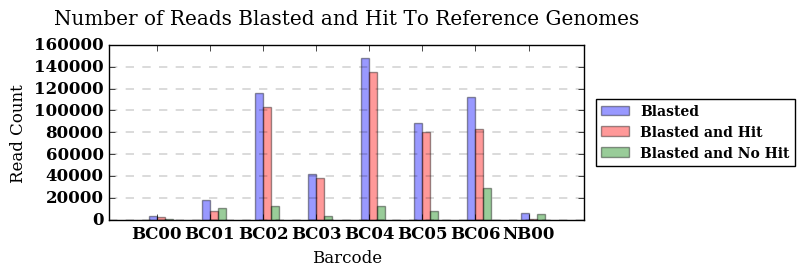

In [1180]:
#two qualitative variables - barcode, blasted vs no hit vs hit
#one quantitative - read count
n_groups = len(blasted_count_df_noall.index.values)

count_blasted = tuple(blasted_count_df_noall['Blasted'])
count_blastedhit = tuple(blasted_count_df_noall['BlastedHit_n'])
count_blastednohit = tuple(blasted_count_df_noall['BlastedNoHit_n'])

fig, ax = plt.subplots(figsize=(6.5,3))

index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.4

rects1 = plt.bar(index, count_blasted, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Blasted')

rects2 = plt.bar(index + bar_width, count_blastedhit, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Blasted and Hit')

rects3 = plt.bar(index + bar_width*2, count_blastednohit, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Blasted and No Hit')

plt.xlabel('Barcode')
plt.ylabel('Read Count')
plt.title('Number of Reads Blasted and Hit To Reference Genomes', y=1.08)
plt.xticks(index + bar_width, tuple(blasted_count_df_noall.index.values))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10)
plt.grid(b=None, which='major', axis='y', linestyle='dashed', linewidth=0.2)
plt.margins(x=0.1)

plt.tight_layout()
plt.show()

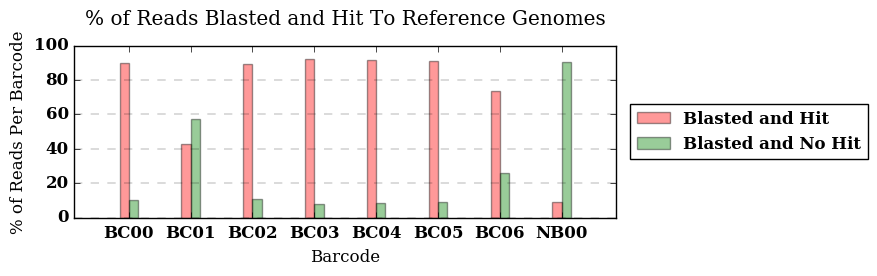

In [1181]:
#two qualitative variables - barcode, blasted vs no hit vs hit
#one quantitative - read count
n_groups = len(blasted_count_df_noall.index.values)

count_blastedhit = tuple(blasted_count_df_noall['BlastedHit %'])
count_blastednohit = tuple(blasted_count_df_noall['BlastedNoHit %'])

fig, ax = plt.subplots(figsize=(6.5,3))

index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.4

rects1 = plt.bar(index, count_blastedhit, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Blasted and Hit')

rects2 = plt.bar(index + bar_width, count_blastednohit, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Blasted and No Hit')

plt.xlabel('Barcode')
plt.ylabel('% of Reads Per Barcode')
plt.title('% of Reads Blasted and Hit To Reference Genomes', y=1.08)
plt.xticks(index + bar_width, tuple(blasted_count_df_noall.index.values), y=-0.01)
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=12)
plt.grid(b=None, which='major', axis='y', linestyle='dashed', linewidth=0.2)
plt.margins(x=0.1)

plt.tight_layout()
plt.show()

In [ ]:
os.chdir('/home/gamran/data/')
outdir = '/home/gamran/analysis/'
os.curdir

b_id = "1212_1D_barcoding_Wagga_"
noblasthit_id = ".WW_19122016.noblasthit.fa"
noblasthit_file = b_id + "BC01" + noblasthit_id
fa_file = b_id + "BC01" + ".fa"

#Filter the original fasta file to only include reads not blasted, export to new fasta file
not_blasted_sequences = []
for seq in SeqIO.parse(open('1212_1D_barcoding_Wagga_BC01.fa'), 'fasta'):
    if seq.id in BC01_not_blasted_list:
        not_blasted_sequences.append(seq)
SeqIO.write(not_blasted_sequences, noblasthit_file, "fasta")



In [98]:
#Shows that some reads are being assigned to the same contig (duplicates)
BC01_sseqid_list = sorted(BC01_b_poretools_df['sseqid'].tolist())
print(len(BC01_sseqid_list))

BC01_sseqid_ulist = sorted(list(set(BC01_b_poretools_df['sseqid'].tolist())))
print(len(BC01_sseqid_ulist))

#BC01_sseqid_list[0][0:4]
#BC01_sseqid_list

7786
7375


In [ ]:
#Draft summary table - first blast run:
#Rows defined by barcode:
#Columns: 

In [ ]:
poretools_df.iloc[:,-2:]

In [ ]:
plt.figure()
grouped = poretools_df.groupby('Barcode')
grouped

In [ ]:
poretools_df.groupby('Barcode').hist(bins=30)
plt.legend()

In [ ]:
grouped.Length.plot(kind='bar')

In [ ]:
poretools_df.pivot_table('Length', 'Barcode')

In [ ]:
poretools_df.head()

In [ ]:
grouped.groups

In [ ]:
import pandas as pd
from numpy.random import randint
import matplotlib.pyplot as plt
df = pd.DataFrame(randint(0,10,(200,6)),columns=list('abcdef'))
df.head()

In [ ]:
grouped.head()

In [ ]:
plt.figure()
grouped = poretools_df.groupby('Barcode')
rowlength = grouped.ngroups/2

fig, axs = plt.subplots(figsize=(15,12), 
                        nrows=2, ncols=int(rowlength),
                        #sharex=True, # fix as above
                        gridspec_kw=dict(hspace=0.4))

plt.setp(axs, xticks=np.arange(0,poretools_df.iloc[:, 2].max()+1,3000))
#plt.xlim(0,poretools_df.iloc[:, 2].max()+1)
print(axs.flatten())

keys = list(grouped.groups.keys())
keys.sort()
targets = zip(keys, axs.flatten())
#print([z for z in targets])

max_count_list = []
for key in grouped.groups.keys():
    max_count_list.append(np.histogram(grouped.Length.get_group(key), 50)[0].max())
max_count_list.sort()
for i, (key, ax) in enumerate(targets):
    #print(i)
    ax.hist(grouped.Length.get_group(key), bins=50)
    ax.set_title('%s' %key)
    ax.set_xlabel('Count')
    ax.set_ylabel('Length')
    _mean = grouped.Length.get_group(key).mean()
    _count = grouped.Length.get_group(key).count()
    ax.text(4000, 1400, r'mean = %sbp'%int(_mean))
    ax.text(4000, 1000, r'count = %s'%int(_count))
    ax.set_xlim(0,poretools_df.iloc[:, 2].max()+1)
    ax.set_ylim(0, max_count_list[-1]+50)
    #ax.xaxis()

#poretools_df.groupby('Barcode')['Length'].hist( bins=50)

In [ ]:
keys = grouped.groups.keys()

In [ ]:
a = list(keys)
a.sort()
a

In [ ]:
max_count_list.sort()
max_count_list[-1]

In [ ]:
np.histogram(grouped.Length.get_group('BC01'), 50)[0].max()

In [ ]:
plt.figure(figsize=(15,15))
poretools_df.iloc[:, 2].hist(bins=50)
plt.xlabel('read_length')
plt.xticks(np.arange(0,poretools_df.iloc[:, 2].max()+1,1000))
plt.ylabel('count')
plt.title(_id + 'pass reads length distribution')
plt.savefig(outdir + _id + "_read_lenght.tiff")

In [ ]:
poretools_df.iloc[:,2].mean()

In [ ]:
poretools_df.iloc[:,2].median()

In [ ]:
poretools_df.iloc[:,2].sum()

In [ ]:
poretools_df.iloc[:,2].max()

In [ ]:
!/Users/ben/.conda/envs/poretools/bin/python ../../nanopore-scripts/expand-cigar.py --bam v91_cns_gcoords_cur_ph_ctg.29092016_M.poretools.cbbu.pass.group1.sorted.bam --fasta v91_cns_gcoords_curs_ph_ctg.fa >  v91_cns_gcoords_cur_ph_ctg.29092016_M.poretools.cbbu.pass.group1.sorted.expanded.bam   

In [ ]:
!which python

In [ ]:
!/Users/ben/.conda/envs/poretools/bin/python ../../nanopore-scripts_BS/count_errors_BS.py v91_cns_gcoords_cur_ph_ctg.29092016_M.poretools.cbbu.pass.group1.sorted.expanded.bam > v91_cns_gcoords_cur_ph_ctg.29092016_M.poretools.cbbu.pass.group1.error_profile.txt    

In [ ]:
error_df  = pd.read_csv('v91_cns_gcoords_cur_ph_ctg.'+_id+'error_profile.txt', sep='\t')

In [ ]:
error_g20_df[error_g20_df['read_len'] > 50000]

In [ ]:
error_df.head()

In [ ]:
error_df["%Identity"] = (error_df['matches']/(error_df['matches']+error_df['deletions']+error_df['insertions']+error_df['mismatches'])*100)

In [ ]:
error_df['%Identity'].hist(bins=30)
plt.xlim(20,100)

In [ ]:
error_df['%Identity'].median()

In [ ]:
error_df.count()

In [ ]:
error_df['%Identity'].mean()

In [ ]:
error_g20_df = error_df[error_df['%Identity'] > 20]

In [ ]:
error_g20_df['%Identity'].median()

In [ ]:
error_g20_df['%Identity'].mean()

In [ ]:
error_g20_df['%Identity'].hist(bins=30)
plt.xlabel('%Identity')
plt.ylabel('Count')
plt.title('1D error rate Metichor calling')
plt.savefig(outdir+_id+'1D_error_rate.tiff')

In [ ]:
error_g20_df['%Identity'].count()

In [ ]:
poretools_df[1].count()

In [ ]:
pc_mapping = error_g20_df['%Identity'].count()/poretools_df[1].count()*100

In [ ]:
pc_mapping

In [ ]:
error_g20_df['read_len'].max()

In [ ]:
plt.scatter(error_g20_df['read_len'], error_g20_df['%Identity'])
plt.xlim(0,error_g20_df['read_len'].max()+10000)
plt.xlabel('read_length')
plt.ylabel('%Identity')
plt.title('1D error rate Metichor calling')
plt.xticks(np.arange(0,error_g20_df['read_len'].max()+10000,20000))
plt.savefig(outdir+_id+'1D_error_rate_v2.tiff')

In [ ]:
error_g20_df['read_len'].hist(bins=20)
plt.xlabel('read_length')
plt.ylabel('count')

In [ ]:
error_g20_df['read_len'].mean()

In [ ]:
error_g20_df['read_len'].median()

In [ ]:
BC01_sseqid2label = {}
for scaffold in BC01_sseqid_list:
    if 'TGAC' in scaffold[0:4]:
        BC01_sseqid2label[scaffold] = 'Wheat'
    if 'Zymo' in scaffold[0:4]:
        BC01_sseqid2label[scaffold] = 'Zymo'
    if 'Ptri' in scaffold[0:4]:
        BC01_sseqid2label[scaffold] = 'Ptri'
    if '0000' in scaffold[0:4]:
        BC01_sseqid2label[scaffold] = 'Pst1_WA'
    if '0001' in scaffold[0:4]:
        BC01_sseqid2label[scaffold] = 'Pst2_WA'

len(BC01_sseqid2label)
# NOTE: DICTIONARIES DO NOT RETAIN DUPLICATES

BC01_sseqid2label_wheat = {k: v for k, v in BC01_sseqid2label.items() if v == 'Wheat'}
len(BC01_sseqid2label_wheat)
BC01_sseqid2label_zymo = {k: v for k, v in BC01_sseqid2label.items() if v == 'Zymo'}
len(BC01_sseqid2label_zymo)